  <header>
    <h1><center>Introduction</center></h1>
    <h2>Udacity Project: Wrangle and Analyze Data</h2>
   </header>

**Datasource**: tweet archive of Twitter user @dog_rates, also known as WeRateDogs

**About**: WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

**Datasets**: three pieces of data which include: 
    <list>
        <p><l1>(a) Enhanced Twitter Archive (twitter_archive_enhanced.csv), </l1></p>
        <p><l2>(b) Image Predictions File (image_predictions.tsv),  and </l2></p>
        <p><l3>(c) Additional Data via the Twitter API</l3></p>
    </list>
    
**Goal**: Wrangle (gather, assess and clean) and analyse to create interesting and trustworthy analyses and visualizations.

<p><b>Name of Student</b>: Ikechukwu Chilaka</p>
<p><b>Date</b>: June 28th, 2022</p>

## 1. Data Gathering

<l1>Dataset1 -The **twitter_archive_enhanced.csv** file has been provided for me, I will first import pandas which I will then use to read the csv file</l1>
    
<l1>Dataset2 -The **image_predictions.tsv** file will be downloaded from the internet using the requests library</l1>

<l1>Dataset3 - Additional data via Twitter API</l1>

In [1]:
#Dataset1  ---preparing the environment
import pandas as pd

In [2]:
#read the **twitter_archive_enhanced.csv** file into a dataframe called df1
df1=pd.read_csv('twitter-archive-enhanced.csv', sep =',')

In [3]:
#view the dataframe
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Dataset2  ---preparing the environment
import requests
import os

I will programmatically download the dataset from Udacity servers and store in a folder image_predictions on my localcomputer

In [5]:
folder_name = 'image_predictions'  #create the collecting folder if it does not exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

An empty folder called 'image_predictions' has been created in the current directory based on the code above

In [6]:
#access data in the url from Udacity servers using the get() method
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

I have accessed the data. I will now write the data to a file into the folder which I created.
I will name use the text after the last slash in the url as the name of the file
Then I will write in write binary(wb) mode so the byte info in the url is converted to human readable txt

In [7]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file: 
        file.write(response.content)

In [8]:
#read the programmatically downloaded **image-predictions.tsv** file into a dataframe called df2
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
#it is \tab separated

In [9]:
#view the dataframe
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#Dataset2  --- additional data via Twitter API querying with tweepy
import tweepy

In [11]:
#for authentication
from tweepy import OAuthHandler 

I was informed to expect 20-30 minutes of run time, I want to check this for sanity purposes. I will import timeit to check this

To wait on Twitter's traffic rate limits which are divided into 15 minute intervals, I will Set the wait_on_rate_limit parameter to True in the tweepy.api class below:

I will be needing the tweet ids from the **twitter_archive_enhanced.csv** data so that I can use that in extracting tweet info on Twitter using the api I have set above

In [12]:
#getting the tweet ids
tweet_ids = df1.tweet_id.values

In [13]:
#view the array to be sure
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [14]:
#check how many tweet ids we have
len(tweet_ids)

2356

After querying each tweet ID, I will write its JSON data to the required tweet_json.txt file with each tweet's JSON data on its own line. To do this, I need the built-in package called json, which can be used to work with JSON data

In [15]:
#importing json
import json

**Now I have the json txt file in my working directory that contains the tweet info such as retweet and favorite counts. Let me extract the retweet count and favorite count**

First I will create an empty  list called df_tweet

Then I will iterate over the lines in the tweet_json.txt files and extract the retweet count and favorite count

After this, I will append the counts to the empty list and create a new dataframe called df3

In [16]:
df_tweet = []

with open('tweet_json.txt') as file:
    for line in file:
        #.loads() method parses the JSON string and converts it into a Python Dictionary
        data = json.loads(line)
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        #append the id as a string and the counts
        df_tweet.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [17]:
#creating the new dataframe
df3 = pd.DataFrame(df_tweet, columns=['id_str', 'retweet_count', 'favorite_count'])

In [18]:
#Dataset3 ---- view the head
df3.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,7010,33829
1,892177421306343426,5302,29343
2,891815181378084864,3482,22069
3,891689557279858688,7227,36955
4,891327558926688256,7765,35324


In [19]:
#how many ids do we have in the third dataset
len(df3)

2325

Seeing we have 2325 successfully extracted tweet info out of len(tweet_ids) which is 2356. I will go ahead to ignore the 32 tweet ids which failed. I can carry on without them. 

At the end of the gathering stage, I have successfully gathered the three datasets required which are now contained in the dataframes: df1, df2 and df3. Moving on

## 2. Assessing Data
I will detect and document at least **eight (8) quality issues and two (2) tidiness issue** using **both** visual and programmatic assessment

I will view the dataframes one after the other

In [20]:
#view the head
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [21]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df3.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,7010,33829
1,892177421306343426,5302,29343
2,891815181378084864,3482,22069
3,891689557279858688,7227,36955
4,891327558926688256,7765,35324


<header><b>Visual assessment</b></header>
    <p><u>Quality Issues</u></p>
<list>
    <p><l1>1. I can see missing values (NAN) in df1 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)</l1> </p>
     <p><l1>2. The time stamp in df1 having +0000 seems odd to me</l1></p>
     <p><l1>3. In df2, some dog names start with capital letters while some start with small letters</l1></p>
</list>
<p><u>Tidiness Issue</u></p>
 <p><l1>1.df2 and df3 could be merged using the id_str/tweet_id. But I need to confirm if they are of equal length first as some  rows will be  dropped  if not so</l1></p>
 <p><l1>2.Also, it would be better if the common column has the same name</l1></p>
 
    I will move on to programmatic assessment to check the lengths out

In [23]:
#check the length  of the dataframes
[len(df2),len(df3)]

[2075, 2325]

df3 is longer than df2 --- I will come back to this.
The text column in df1 has been truncated to fit onscreen. I need to view it properly. Let me take 30 random samples for viewing

In [24]:
df1.text.sample(30)

1922    Say hello to Bobbay. He's a marshmallow wizard...
2107    Silly dog here. Wearing bunny ears. Nice long ...
1444    This is Trevith. He's a Swiss Mountain Roadwoo...
288     This is Stanley. Somehow he heard you tell him...
1159    This is Sarge. Not even he knows what his tong...
2118    This is Damon. The newest presidential candida...
1788    Reckless pupper here. Not even looking at road...
1313    Ever seen a dog pet another dog? Both 13/10 tr...
2110    This is Paull. He just stubbed his toe. 10/10 ...
796     This is Chip. He's a pupholder. Comes with the...
214     This is Iggy. He was a rescue dog killed in th...
1502    This is Teddy. His head is too heavy. 13/10 (v...
159     RT @dog_rates: Meet Lorenzo. He's an avid nift...
338     This is Charlie. He fell asleep on a heating v...
2166    Here we have a Gingivitis Pumpernickel named Z...
1667    Meet Joey and Izzy. Joey only has one ear that...
523     I call this one "A Blep by the Sea" 12/10 http...
1454    We nor

The text is still truncated and I can't see everything it contains.  I will set the display option for a better view

In [25]:
pd.set_option('display.max_colwidth', -1)

In [26]:
df1.text.sample(30)

1939    When you're having a great time sleeping and your mom comes in and turns on the lights. 10/10 https://t.co/6qYd6BNSPd                                                 
1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                                         
1349    This sneezy pupper is just adorable af. 12/10 (vid by @gwilks1) https://t.co/h5aI0Tim4j                                                                               
22      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                  
2102    This is Pluto. He's holding little waddling dog hostage. Little waddling dog very desperate at this point sos. 8/10 https://t.co/HMcD9SLOAN                           
1428    This pupper doubles as a hallway rug. Very rare. Versatile af. 11/10 https://t.co/Jxd5pR02Cn                         

<header><b>Programmatic assessment</b></header>
<p><u>Tidiness Issue</u></p>
**df1**

3. Now I can see that the text contains rating and url. Also In 320 and 1251, two dogs were tweeted about in the same tweet

Let me get more info on the datasets

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
id_str            2325 non-null object
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(2), object(1)
memory usage: 45.5+ KB


<header><b>Programmatic assessment</b></header>

**From the info the datasets:**
<p><u>Quality Issues</u></p>

**df1**

4. the tweet ids are not objects but integer datatype. I won't be performing any math operation on the tweet ids so I would want them as object

5. the columns I mentioned earlier with missing values have a very small amount of data. Expanded url also gas missing values

6. the timestamp should column should be in datetime and not int

**df2** 

7. the tweet ids are not objects but integer datatype.

8. Also, a look at the dog stages in df1 and I can see a whole lot of 'none'. I will take a look at the composition of the values in those columns

In [30]:
doggo = df1.doggo.value_counts()
floofer = df1.floofer.value_counts()
pupper = df1.pupper.value_counts()
puppo = df1.puppo.value_counts()
print(doggo); 
print(floofer); 
print(pupper); 
print(puppo)

None     2259
doggo    97  
Name: doggo, dtype: int64
None       2346
floofer    10  
Name: floofer, dtype: int64
None      2099
pupper    257 
Name: pupper, dtype: int64
None     2326
puppo    30  
Name: puppo, dtype: int64


*There are a lot of "none" returns*

<header><b>Programmatic assessment</b></header>

<p><u>Tidiness Issue</u></p>
**df1**
4. I think the four columns could be combined under one column called 'dog_stage

Let me see how many dogs don't have dog stage

In [31]:
print(str(len(df1) - (97+10+257+30))+" dogs don't have a dog stage")

1962 dogs don't have a dog stage


Let me  also take  a look at the  dog names

In [32]:
df1.name.value_counts().head(20)

None       745
a          55 
Charlie    12 
Cooper     11 
Lucy       11 
Oliver     11 
Penny      10 
Lola       10 
Tucker     10 
Bo         9  
Winston    9  
Sadie      8  
the        8  
Daisy      7  
Bailey     7  
an         7  
Toby       7  
Buddy      7  
Rusty      6  
Jack       6  
Name: name, dtype: int64

<header><b>Programmatic assessment</b></header>
<p><u>Quality Issue</u></p>

**df1**

9.----745 dogs don't have names, some dogs have the same names. Some odd names like 'a' or 'an'

At this point, I have looked at all the columns in df1 except **source**. Let me do that now

In [33]:
df1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [34]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The max rating shows 1776 as a numerator and 170 as a denominator. Those values are questionable. I'd like to check

In [35]:
df1[df1.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [36]:
df1[df1.rating_denominator == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


Well, the ratings((1776/10),(204/170)) show the numerators were greater thann the denominators. Maybe the dogs were just that good, lol..

<header><b>Programmatic assessment</b></header>
<p><u>Tidiness Issue</u></p>

**df1**

5. The content in the source column hard to understand at first glance

<header><b><center>Assessment Report</center></b></header>

**Quality Issues**
<center><b>df1</b></center>

1. Missing values (NAN) in df1 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, and expanded url)

2. The tweet ids are not objects but integer datatype. 

3. The timestamp should column should be in datetime and not int

4. Dog stages in df1 and I can see a whole lot of missing values 

5. 745 dogs don't have names, some dogs have the same names. Some odd names like 'a' or 'an'


<center><b>df2</b></center>

6. Some dog names start with capital letters while some start with small letters

7. The tweet ids are not objects but integer datatype. 

**Tidiness Issues**

1. df2 and df3 could be merged using the id_str/tweet_id.

2. The common column above does not have the same name

3. df1 text column contains rating and url. Two dogs were tweeted about in the same tweet

4. The content in the source column hard to understand at first glance

5. Dog stages having four columns

## 3. Cleaning Data

**My Key Notes**

To meet specifications, I only want original ratings (not retweets) that have images.

During cleaning, I'll use the define-code-test framework and clearly document it.

I'll make a copy of the original data before cleaning. 

Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master DataFrame

In [37]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

**I will  sart with the  first  dataframe (df1)**

To meet specifications, I only want original ratings (not retweets) that have images

I now understand why retweeted_status_id and in_reply_to_status_id had few data entries. That was just the amount of retweets or replies

**Define**

Check for rts and replies in the retweeted_status_id and in_reply_to_status_id and remove them

In [38]:
#Code -check where retweeted_status_id and in_reply_to_status_id are not null and return their indices(row number) in a list
retweet = df1_clean[pd.notnull(df1_clean['retweeted_status_id'])].index.to_list()
reply = df1_clean[pd.notnull(df1_clean['in_reply_to_status_id'])].index.to_list()

In [39]:
#Then drop the rows using their indices
df1_clean.drop(index=retweet, inplace=True)
df1_clean.drop(index=reply, inplace=True)

In [40]:
#Test
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

I can see that retweet status and reply status now have 0 entries. Moving on...

**Define**

Now drop the column with missing values using dropna()

Drop unwanted column - the "source" column will not be used 

In [41]:
df1_clean.dropna(axis=1,how='any', inplace=True)
#axis=1 will drop columns, how: if there is any column at all with one missing value, drop it

df1_clean.drop(columns='source', inplace=True)

In [42]:
df1_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1730,679854723806179328,2015-12-24 02:42:51 +0000,This is Bruce. He's a rare pup. Covered in Frosted Flakes. Nifty gold teeth. Overall good dog. 7/10 would pet firmly https://t.co/RtxxACzZ8A,7,10,Bruce,None,None,None,None
1320,706346369204748288,2016-03-06 05:11:12 +0000,This is Koda. She's a Beneboom Cumberwiggle. 12/10 petable as hell https://t.co/VZV6oMJmU6,12,10,Koda,None,None,None,None
1154,725458796924002305,2016-04-27 22:57:10 +0000,Pup had to be removed cuz it wouldn't have been fair to the opposing team. 13/10 absolute legend ⚽️\nhttps://t.co/BHICimO58W,13,10,None,None,None,None,None
490,813812741911748608,2016-12-27 18:24:12 +0000,"Meet Gary, Carrie Fisher's dog. Idk what I can say about Gary that reflects the inspirational awesomeness that was Carrie Fisher. 14/10 RIP https://t.co/uBnQTNEeGg",14,10,Gary,None,None,None,None
2051,671488513339211776,2015-12-01 00:38:31 +0000,This is Julius. He's a cool dog. Carries seashell everywhere. Rad segmented legs. Currently attacking castle. 8/10 https://t.co/CwUK5AIgeD,8,10,Julius,None,None,None,None


In [43]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 122.9+ KB


**Define**

Make the dog names be start with lower case for uniformity

In [44]:
#code
df1_clean['name'] = df1_clean['name'].str.lower()

In [45]:
#Test
df1_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
52,882045870035918850,2017-07-04 01:18:17 +0000,"This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko https://t.co/zeDpnsKX7w",13,10,koko,None,None,None,None
1226,713919462244790272,2016-03-27 02:43:58 +0000,This is Kanu. He's a Freckled Ticonderoga. Simply flawless. 12/10 would perform an elaborate heist to capture https://t.co/7vyAzIURrE,12,10,kanu,None,None,None,None
1188,718454725339934721,2016-04-08 15:05:29 +0000,"This pic is old but I hadn't seen it until today and had to share. Creative af. 13/10 very good boy, would pet well https://t.co/4kD16wMA1Z",13,10,none,None,None,None,None
2026,671879137494245376,2015-12-02 02:30:43 +0000,This is Brad. He's a chubby lil pup. Doesn't really need the food he's trying to reach. 5/10 you've had enough Brad https://t.co/vPXKSaNsbE,5,10,brad,None,None,None,None
1601,686003207160610816,2016-01-10 01:54:44 +0000,This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,3,10,hammond,None,None,None,None


**Define**
Make the common column between df2 and df3 have the same name.
Name "id_str" to "tweet_id" in df3

In [46]:
#Code
df3_clean.rename(columns={"id_str": "tweet_id"}, inplace=True)

In [47]:
# Test
df3_clean.head(0)

,tweet_id,retweet_count,favorite_count


**Fix the datatypes**

**Define**

df1_clean - change tweet_id to string using astype(), timestamp to datetime using pd_to_datetime() function

df2_clean - change tweet_id to string using astype()

In [48]:
#Code
df1_clean['tweet_id'] = df1_clean['tweet_id'].astype('str')
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype('str')

Test by viewing the info of both df1_clean and df2_clean

In [49]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns, UTC]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 122.9+ KB


In [50]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


Just like I made I put the dog names in lower case, I will do the same for the breeds in df2_clean

**Define**

change the dog breeds to lower case alphabets using .lower()function

In [51]:
#code
df2_clean['p1'] = df2_clean['p1'].str.lower()
df2_clean['p2'] = df2_clean['p2'].str.lower()
df2_clean['p3'] = df2_clean['p3'].str.lower()

In [52]:
#Test
df2_clean['p1'].sample(3)

221    toy_poodle
383    ski_mask  
601    bloodhound
Name: p1, dtype: object

In [53]:
df2_clean['p2'].sample(3)

1784    cocker_spaniel
441     pomeranian    
819     doberman      
Name: p2, dtype: object

In [54]:
df2_clean['p3'].sample(3)

647     pot               
1878    labrador_retriever
458     maltese_dog       
Name: p3, dtype: object

Let me review the text column in df1_clean to see what needs cleaning

In [55]:
df1_clean.text.sample(7)

1237    Reminder that we made our first set of stickers available! All are 12/10 would stick\nUse code "pupper" at checkout🐶\n\nhttps://t.co/kJIMNyMNKV     
1420    This is Franklin. He's a yoga master. Trying to get rid of those rolls. Dedicated af. 11/10 keep it up pup https://t.co/S712MJXulD                  
1207    This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9           
1094    This is Chadrick. He's gnarly af 13/10 https://t.co/447tyBN0mW                                                                                      
1182    This is Sadie. She is prepared for battle. 10/10 https://t.co/JRckDkZVRT                                                                            
658     When she says you're a good boy and you know you're a good boy because you're a good boy. 13/10 https://t.co/O5IUmRHRIh                             
377     Say hello to Brutus and Jersey. They think they're

**Define**

Replace \n for new line with empty space

Replace the url which terminates the texts with empty space

Replace "&amp" in some of the texts with "&". (&amp; is the character reference for "An ampersand")

Remove these spaces with str.strip()

In [56]:
#Code
df1_clean['text'] = df1_clean.text.str.replace("\n", " ")
df1_clean['text'] = df1_clean.text.str.replace(r"http\S+", "")
df1_clean['text'] = df1_clean.text.str.replace("&amp;", "&")
df1_clean['text'] = df1_clean.text.str.strip()

In [57]:
#Test - check for any text still having &amp
df1_clean.query("text == '&amp;'")

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [58]:
#Test  -  check random samples for \n and url
df1_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
750,779123168116150273,2016-09-23 01:00:13+00:00,This is Reggie. He hugs everyone he meets. 12/10 keep spreading the love Reggie,12,10,reggie,None,None,None,None
1220,714606013974974464,2016-03-29 00:12:05+00:00,Here are two lil cuddly puppers. Both 12/10 would snug like so much,12,10,none,None,None,None,None
1346,704480331685040129,2016-03-01 01:36:14+00:00,Meet Lucia. She's a Cumulonimbus Floofmallow. Only has two legs tho (unfortunate). 11/10 would definitely still pet,11,10,lucia,None,None,None,None
127,867900495410671616,2017-05-26 00:29:37+00:00,"Unbelievable. We only rate dogs. Please don't send in non-canines like the ""I"" from Pixar's opening credits. Thank you... 12/10",12,10,none,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody,99,90,none,None,None,None,None


let me see if the ratings in the text extracted corresponds to what we have in the text column.

**Code**

In [59]:
df1_clean.reset_index(inplace=True, drop=True)

In [60]:
#Checking for texts with ratings that have decimal
decimal= df1_clean[df1_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
decimal

C:\Users\IYKE\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26


I noticed that the figures after the decimal point were used as the rating_numerator. The whole number was ignored. 

**Define**
This is not right. Correct the rating_numerator (row 3) using .iloc

In [61]:
#Code
df1_clean.iloc[41, 3] = 13.5
df1_clean.iloc[528, 3] = 9.75
df1_clean.iloc[586, 3] = 11.27
df1_clean.iloc[1474, 3] = 11.26

In [62]:
#Test
df1_clean.iloc[[41,528,586,1474]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
41,883482846933004288,2017-07-08 00:28:19+00:00,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10,bella,None,None,None,None
528,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10,logan,None,None,None,None
586,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10,sophie,None,None,pupper,None
1474,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10,none,None,None,None,None



Next, I will check for texts that have more than one rating and return the number of matches they have

Then I will get the indices of these rows for further cleaning. Phew

In [63]:
two_rating = df1_clean.text.str.extractall(r"(\d+\d*\/\d+)").sort_values(by='match', ascending = False).query('match>0')
two_rating.head()

,,0
,match,
1759,2,12/10
1136,1,2/10
1307,1,10/10
1239,1,5/10
1005,1,8/10


In [64]:
#Get the indices
two_rating.index.codes

FrozenList([[1759, 1136, 1307, 1239, 1005, 948, 2005, 1860, 1592, 2076, 1719, 1426, 1811, 1556, 1653, 853, 1649, 1759, 985, 1278, 797, 1960, 1294, 2014, 1922, 1234, 2047, 588], [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [65]:
#locate these rows and see how these excess ratings came about
df1_clean.iloc[[1759, 1136, 1307, 1239, 1005, 948, 2005, 1860, 1592, 2076, 1719, 1426, 1811, 1556, 1653, 853, 1649, 1759,
            985, 1278, 797, 1960, 1294, 2014, 1922, 1234, 2047, 588]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1759,672248013293752320,2015-12-03 02:56:30+00:00,10/10 for dog. 7/10 for cat. 12/10 for human. Much skill. Would pet all,10.0,10,none,None,None,None,None
1136,703356393781329922,2016-02-26 23:10:06+00:00,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10,9.0,10,socks,None,None,None,None
1307,689835978131935233,2016-01-20 15:44:48+00:00,Meet Fynn & Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 & 10/10,11.0,10,fynn,None,None,None,None
1239,694352839993344000,2016-02-02 02:53:12+00:00,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random & can't bark for shit. 10/10 & 5/10,10.0,10,oliviér,None,None,None,None
1005,714258258790387713,2016-03-28 01:10:13+00:00,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 & 8/10 get it together Flurp,10.0,10,travis,None,None,None,None
948,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all,4.0,20,none,None,None,None,None
2005,667544320556335104,2015-11-20 03:25:43+00:00,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10",10.0,10,kial,None,None,None,None
1860,670434127938719744,2015-11-28 02:48:46+00:00,Meet Hank and Sully. Hank is very proud of the pumpkin they found and Sully doesn't give a shit. 11/10 and 8/10,11.0,10,hank,None,None,None,None
1592,676191832485810177,2015-12-14 00:07:50+00:00,These two pups just met and have instantly bonded. Spectacular scene. Mesmerizing af. 10/10 and 7/10 for blue dog,10.0,10,none,None,None,None,None
2076,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,1.0,2,an,None,None,None,None


I can see some ratings appear double because two items were rated while others were obvious mistakes.

**Define**

I will correct these ratings by extraction into col 3 and 4 which are numerator and denominator columns

In [66]:
#Code
#rating mistaken for Cannabis culture slang [https://en.wikipedia.org/wiki/420_(cannabis_culture)]
df1_clean.iloc[948, 3] = 13
df1_clean.iloc[948, 4] = 10

#rating mistaken for 9/11(September 11th)
df1_clean.iloc[853, 3] = 14
df1_clean.iloc[853, 4] = 10

#rating mistaken for 50/50 split
df1_clean.iloc[985, 3] = 11
df1_clean.iloc[985, 4] = 10

#rating mistaken for  1/2 representing "half"
df1_clean.iloc[2076, 3] = 9
df1_clean.iloc[2076, 4] = 10

#rating mistaken for 7/11 which could be the name of a store
df1_clean.iloc[1426, 3] = 10
df1_clean.iloc[1426, 4] = 10

#The rest had multiple rating (23 in number)
double_rating = df1_clean.iloc[[1759, 1136, 1307, 1239, 1005, 2005, 1860, 1592, 1719, 1811, 1556, 1653, 1649, 1759,
            1278, 797, 1960, 1294, 2014, 1922, 1234, 2047, 588]]

In [67]:
#Test
df1_clean.iloc[[948,853,985,2076,1426]]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
948,722974582966214656,2016-04-21 02:25:47+00:00,Happy 4/20 from the squad! 13/10 for all,13.0,10,none,None,None,None,None
853,740373189193256964,2016-06-08 02:41:38+00:00,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP",14.0,10,none,None,None,None,None
985,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10,11.0,10,bluebert,None,None,None,None
2076,666287406224695296,2015-11-16 16:11:11+00:00,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10,9.0,10,an,None,None,None,None
1426,682962037429899265,2016-01-01 16:30:13+00:00,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10,10.0,10,darrel,None,None,None,None


**Define**

Remove the rows that had multiple ratings using  .drop() function as it is impossible to tell which rating will be relevant to the analysis. I need oly one true rating

In [68]:
#Code
#make a list if the indices
drop_double = double_rating.index
#drop them
df1_clean.drop(axis='index', index=drop_double, inplace=True)

In [69]:
#Test - check the number of rows. It should reduce from 2097 to 2075
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id              2075 non-null object
timestamp             2075 non-null datetime64[ns, UTC]
text                  2075 non-null object
rating_numerator      2075 non-null float64
rating_denominator    2075 non-null int64
name                  2075 non-null object
doggo                 2075 non-null object
floofer               2075 non-null object
pupper                2075 non-null object
puppo                 2075 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 121.6+ KB


**Define**
Combine the four dog_stages into a single column called dog_stage using the combine_first function

Then drop the four dog_stages columns after I have used them

To make the combination possible, I will first replace all 'None' to np NaN. So I need to import numpy first

In [70]:
import numpy as np

In [71]:
#Code - replace None with NaN
dog_stages = ['doggo','floofer','pupper', 'puppo']
for stage in dog_stages:
    df1_clean[stage] = df1_clean[stage].replace('None',np.nan) 

In [72]:
#Test
df1_clean.head(0)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [73]:
df1_clean['dog_stage'] =\
df1_clean.doggo.combine_first(df1_clean.floofer).combine_first(df1_clean.pupper).combine_first(df1_clean.puppo)

In [74]:
df1_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1185,699072405256409088,2016-02-15 03:27:04+00:00,ERMAHGERD 12/10 please enjoy,12.0,10,none,NaN,NaN,NaN,NaN,NaN
219,840696689258311684,2017-03-11 22:51:24+00:00,I didn't even have to intervene. Took him 4 minutes to realize his error. 10/10 for Kevin,10.0,10,none,NaN,NaN,NaN,NaN,NaN
208,843235543001513987,2017-03-18 22:59:54+00:00,This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck,13.0,10,tycho,NaN,NaN,NaN,NaN,NaN


In [75]:
#Drop the other four columns
df1_clean = df1_clean.drop(columns=dog_stages)
df1_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,phineas,NaN


**Merging the datasets**

First merge df1_clean and df2_clean on the tweet_id column using .join()

Then merge df3_clean, using .merge() function. This will drop the columns in df3 that are not in the first merge

Recall that df3_clean has just rt and fave count, so keeping those columns will not be so helpful to me without info on the dogs

In [76]:
#Code - First merge
merge1n2 = df1_clean.join(df2_clean.set_index('tweet_id'), on='tweet_id')

In [77]:
#Test
merge1n2.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,13.0,10,phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [78]:
#Code - Second merge
merge1n2n3 = merge1n2.merge(df3_clean.set_index('tweet_id'), on='tweet_id')

In [79]:
merge1n2n3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 20 columns):
tweet_id              2066 non-null object
timestamp             2066 non-null datetime64[ns, UTC]
text                  2066 non-null object
rating_numerator      2066 non-null float64
rating_denominator    2066 non-null int64
name                  2066 non-null object
dog_stage             332 non-null object
jpg_url               1940 non-null object
img_num               1940 non-null float64
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null object
p2                    1940 non-null object
p2_conf               1940 non-null float64
p2_dog                1940 non-null object
p3                    1940 non-null object
p3_conf               1940 non-null float64
p3_dog                1940 non-null object
retweet_count         2066 non-null int64
favorite_count        2066 non-null int64
dtypes: datetime64[

In [80]:
jpg_drop = merge1n2n3[merge1n2n3.jpg_url.isnull()]

From the merge1n2n3 above, I can see that some dogs do not have image predictions, this means there is no url to fetch their images. 

**Define**
Take only rows where jpg_url is not null and call it "master"

In [81]:
#Code - get the indices
master = merge1n2n3[merge1n2n3['jpg_url'].notna()]

In [82]:
#Test
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 2065
Data columns (total 20 columns):
tweet_id              1940 non-null object
timestamp             1940 non-null datetime64[ns, UTC]
text                  1940 non-null object
rating_numerator      1940 non-null float64
rating_denominator    1940 non-null int64
name                  1940 non-null object
dog_stage             299 non-null object
jpg_url               1940 non-null object
img_num               1940 non-null float64
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null object
p2                    1940 non-null object
p2_conf               1940 non-null float64
p2_dog                1940 non-null object
p3                    1940 non-null object
p3_conf               1940 non-null float64
p3_dog                1940 non-null object
retweet_count         1940 non-null int64
favorite_count        1940 non-null int64
dtypes: datetime64[

In [83]:
#Save to csv - This took a lot of effort, lol
master.to_csv('twitter_archive_master.csv', sep=',', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, I will produce at least **three (3) insights and one (1) visualization**

In [84]:
#Statistical findings first
#1.Quantitative description
master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1940.000000,1940.000000,1940.000000,1940.000000,1.940000e+03,1.940000e+03,1940.000000,1940.000000
mean,12.208134,10.462371,1.203093,0.593918,1.343662e-01,6.026876e-02,2278.804124,7829.406186
std,41.926483,6.842901,0.561798,0.272362,1.008137e-01,5.095470e-02,4060.746084,11481.090510
min,0.000000,7.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,66.000000
25%,10.000000,10.000000,1.000000,0.360456,5.297397e-02,1.623400e-02,503.000000,1706.500000
50%,11.000000,10.000000,1.000000,0.587440,1.173995e-01,4.947920e-02,1104.000000,3540.500000
75%,12.000000,10.000000,1.000000,0.846718,1.954432e-01,9.152147e-02,2595.750000,9746.500000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,70791.000000,144958.000000


In [85]:
#Minimum rating_numerator is 0. Weird that a dog would get zero --- with that high amount of retweets, not fair
master[master.rating_numerator ==0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
243,835152434251116546,2017-02-24 15:40:31+00:00,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10,0.0,10,none,NaN,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3.0,swing,0.967066,False,american_staffordshire_terrier,0.012731,True,staffordshire_bullterrier,0.007039,True,2765,20993


The algorithm shows more confidence in the first prediction (p1) than others. That makes sense since the predictions are made in that order. 

The values in this cleaned dataset are are not out of place

##  Question1: What dog stage occured the most?

In [86]:
#Visualization package
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
stage_count = master.dog_stage.value_counts()

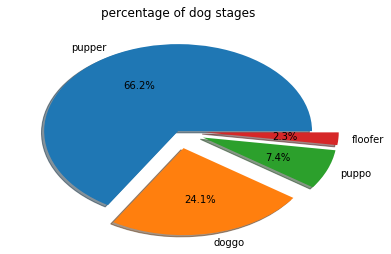

In [88]:
plt.pie(stage_count, labels =stage_count.index, shadow=True, autopct='%1.1f%%', explode=(0,0.2,0.2,0.2))
plt.title('percentage of dog stages')
plt.show()

In [89]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 2065
Data columns (total 20 columns):
tweet_id              1940 non-null object
timestamp             1940 non-null datetime64[ns, UTC]
text                  1940 non-null object
rating_numerator      1940 non-null float64
rating_denominator    1940 non-null int64
name                  1940 non-null object
dog_stage             299 non-null object
jpg_url               1940 non-null object
img_num               1940 non-null float64
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null object
p2                    1940 non-null object
p2_conf               1940 non-null float64
p2_dog                1940 non-null object
p3                    1940 non-null object
p3_conf               1940 non-null float64
p3_dog                1940 non-null object
retweet_count         1940 non-null int64
favorite_count        1940 non-null int64
dtypes: datetime64[

#Int64Index: 1940 entries, 0 to 2065

This tells me there are blank rows.

**Define**

Drop blank rows and reset_index

In [90]:
#Code
master.dropna(how='all')
master = master.reset_index(drop=True)

#Test
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 20 columns):
tweet_id              1940 non-null object
timestamp             1940 non-null datetime64[ns, UTC]
text                  1940 non-null object
rating_numerator      1940 non-null float64
rating_denominator    1940 non-null int64
name                  1940 non-null object
dog_stage             299 non-null object
jpg_url               1940 non-null object
img_num               1940 non-null float64
p1                    1940 non-null object
p1_conf               1940 non-null float64
p1_dog                1940 non-null object
p2                    1940 non-null object
p2_conf               1940 non-null float64
p2_dog                1940 non-null object
p3                    1940 non-null object
p3_conf               1940 non-null float64
p3_dog                1940 non-null object
retweet_count         1940 non-null int64
favorite_count        1940 non-null int64
dtypes: datetime64[

## Question 2: What are the Five topmost rated dogs?

I will introduce a calculated column (rating_calc) which will return the rating as a fraction

Then I will get the indices of the top 6 using nlargest() function

After this, I will return the datframe using iloc and

In [91]:
#calculated column
master['rating_calc']=(master['rating_numerator']/master['rating_denominator'])

In [92]:
master.rating_calc.nlargest(n=6).index

Int64Index([714, 1671, 378, 9, 21, 36], dtype='int64')

In [93]:
top_six = master.iloc[[714, 1671, 378, 9, 21, 36]]
top_six.groupby(['name'])['rating_calc'].sum().sort_values(ascending =False)

name
atticus    177.600000
none       43.400000 
sam        3.428571  
such       1.400000  
cassie     1.400000  
Name: rating_calc, dtype: float64

Atticus, None, Sam, Such, and Cassie
However, None indicates missing name and Such does not sound like a real dog name, but who knows?

## Question 3: Dog images with highest engagements are tweeted when?

Which day has the highest original tweet made?

Which day has the highest retweet?

Which day has the highest favorites?

In [94]:
#Get the day of the original tweet using .dt.time()

master['day'] = master['timestamp'].dt.day_name()

In [95]:
highest_tweet=master.day.value_counts()
highest_tweet

Monday       320
Tuesday      288
Wednesday    286
Friday       274
Thursday     273
Sunday       252
Saturday     247
Name: day, dtype: int64

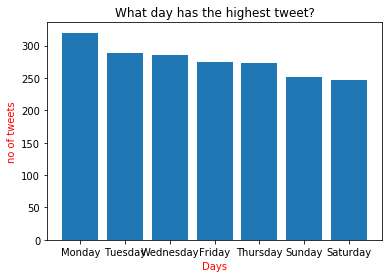

In [96]:
#Univariate
plt.bar(highest_tweet.index, highest_tweet.values)
plt.title('What day has the highest tweet?')
plt.xlabel('Days', color = 'red')
plt.ylabel('no of tweets', color ='red')
plt.show()

In [97]:
#Which day has the highest retweet?

retweet = master.groupby(['day'])['retweet_count'].mean().sort_values(ascending=False)
retweet = retweet.to_frame().reset_index()

In [98]:
#Which day has the highest favorite count?

favorite =master.groupby(['day'])['favorite_count'].mean().sort_values(ascending=False)
favorite =favorite.to_frame().reset_index()

In [99]:
engagements = pd.merge(retweet,favorite)
engagements

,day,retweet_count,favorite_count
0,Wednesday,2556.286713,8719.972028
1,Saturday,2489.129555,8113.757085
2,Friday,2314.405109,7704.025547
3,Tuesday,2253.357639,8073.298611
4,Sunday,2193.250000,7698.841270
5,Monday,2145.950000,7388.206250
6,Thursday,2023.626374,7145.388278


Wednesday has the highest engagements (both rts and fave). Could this be that cute dogs images are tweeted more on Wednesdays and Saturdays. Well, it is mid-week, it is unusual that Wednesday has that high number of engagements when more of the tweets from WeRateDogs are on Mondays

Furthermore, I see a relationship between rts and favorites. Let me check this

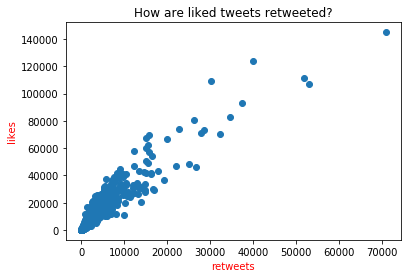

In [100]:
#Bivariate
plt.scatter(master.retweet_count, master.favorite_count)
plt.title('How are liked tweets retweeted?')
plt.xlabel('retweets', color = 'red')
plt.ylabel('likes', color = 'red')
plt.show()

There is a very strong correlation. The plot shows a very linear relationship

### Insights:

**1. Pupper is the most popular dog stage. The least popular is floofer. Pupper is an affectionate term for a dog or puppy, I guess dog owners would prefer to use the term more**

**2. Atticus, Sam, and Cassie are the 3 topmost rated dogs with actual names**

**3. WeRateDogs tweet more on Mondays but get higher engamements from subscribers on Wednesdays. They can harness to generate more traffic on Wednesdays. As it appears, the subscribers will not only like, but will also retweet**